# Reducing Dimensionality Using Factor Analysis

In [24]:
import pandas as pd
import pylab
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.decomposition import FactorAnalysis

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [25]:
df = pd.read_csv('datasets/diabetes_processed.csv')

In [26]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


In [27]:
FEATURES = list(df.columns[:-1])

FEATURES

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [28]:
LABEL = 'Outcome'

In [33]:
def build_model(n_components):
    
    X = df[FEATURES]
    Y = df[LABEL]
    
    fa_obj = FactorAnalysis(n_components = n_components,
                           random_state = 10,
                           max_iter=10000)
    
    x_new = fa_obj.fit_transform(X, Y)
    X = pd.DataFrame(x_new)
    
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
    
    model = LogisticRegression(solver = 'liblinear',
                              max_iter=1000)
    
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    pred_results = pd.DataFrame({'y_test ' : y_test,
                                'y_pred ' : y_pred})
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    return {'fact_a_obj' : fa_obj,
           'transform_x' : X,
           'accuracy' : acc,
           'precision' : prec,
           'recall' : recall}

In [34]:
def compare_results(result_dict):
    
    for key in result_dict:
        print('Test: ', key)
        
        print()
        print('accuracy_score : ', result_dict[key]['accuracy'])
        print('precision_score : ', result_dict[key]['precision'])
        print('recall_score : ', result_dict[key]['recall'])
        
        print()

In [35]:
def visualize_results(result_dict):
    
    n_components = list(range(0, 8))
    acc = [result_dict[key]['accuracy'] for key in result_dict]
    precision = [result_dict[key]['precision'] for key in result_dict]
    recall = [result_dict[key]['recall'] for key in result_dict]
    
    plt.figure(figsize = (12, 10))
    plt.plot(n_components, acc, label='Accuracy')
    plt.plot(n_components, precision, label='Precision')
    plt.plot(n_components, recall, label='Recall')
    
    plt.xlabel('n components')
    plt.ylabel('score');
    
    plt.legend()
    
    plt.show()

In [36]:
result_dict = {}

for i in range (1, 9):
    result_dict['n_components - ' + str(i)] = build_model(i)

In [37]:
compare_results(result_dict)

Test:  n_components - 1

accuracy_score :  0.6948051948051948
precision_score :  0.6071428571428571
recall_score :  0.32075471698113206

Test:  n_components - 2

accuracy_score :  0.7012987012987013
precision_score :  0.5952380952380952
recall_score :  0.46296296296296297

Test:  n_components - 3

accuracy_score :  0.6688311688311688
precision_score :  0.6470588235294118
recall_score :  0.36065573770491804

Test:  n_components - 4

accuracy_score :  0.7532467532467533
precision_score :  0.675
recall_score :  0.5192307692307693

Test:  n_components - 5

accuracy_score :  0.7987012987012987
precision_score :  0.7948717948717948
recall_score :  0.5740740740740741

Test:  n_components - 6

accuracy_score :  0.7467532467532467
precision_score :  0.6578947368421053
recall_score :  0.49019607843137253

Test:  n_components - 7

accuracy_score :  0.7727272727272727
precision_score :  0.7575757575757576
recall_score :  0.4807692307692308

Test:  n_components - 8

accuracy_score :  0.707792207792

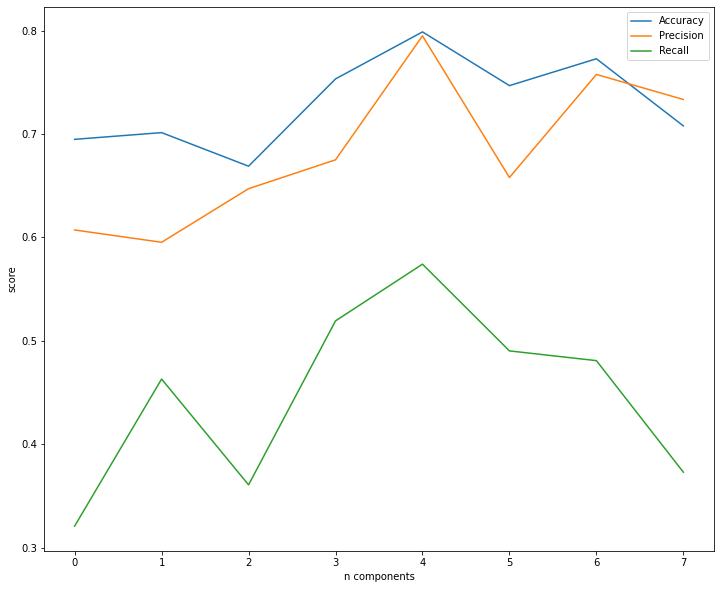

In [38]:
visualize_results(result_dict)